# Main Notebook to run the Code in Colab

Open this notebook in Colab, the first few cells will copy the repo from git and make the modules available in the notebook itself.

Import any packages from the GitHub repo (for example from the src directory)
by calling src.package_name

In [31]:
# only clone and run this notebook in colab. The import should fail otherwise
import google.colab
from google.colab import files
import os
import sys

!git clone https://github.com/AveraGE0/MLRFH.git

src_path = os.path.join("MLRFH/")
# Add src folder to sys.path if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

fatal: destination path 'MLRFH' already exists and is not an empty directory.


In [32]:
os.chdir("MLRFH/")
!git pull https://github.com/AveraGE0/MLRFH.git
os.chdir("../")

From https://github.com/AveraGE0/MLRFH
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [33]:

PROJECT_ID = "mrih-440308" # Replace

In [34]:
import os
from google.colab import auth

DATASET_PROJECT_ID = 'amsterdamumcdb'
DATASET_ID = 'version1_5_0'
LOCATION = 'eu'

os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')

Authenticated


In [35]:
%load_ext google.colab.data_table
from google.colab.data_table import DataTable

DataTable.max_columns = 30
DataTable.max_rows = 30000

from google.cloud.bigquery import magics
from google.cloud import bigquery

def_config = bigquery.job.QueryJobConfig(default_dataset=DATASET_PROJECT_ID + "." + DATASET_ID)
magics.context.default_query_job_config = def_config

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


config_gbq = {
    'query': {
        'defaultDataset': {
              "datasetId": DATASET_ID,
              "projectId": DATASET_PROJECT_ID
        },
    'Location': LOCATION}
}

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [36]:
#get the amsterdamumcdb package from PyPI repository for use in Colab
!pip install amsterdamumcdb
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
import amsterdamumcdb as adb

Looking in indexes: https://download.pytorch.org/whl/cu118


Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
INFO: 
Unique septic persons: 1746
Unique septic admissions: 1882
INFO: 
Unique septic shock persons: 1258
Unique septic shock admissions: 1321
Downloading: 100%|██████████|
Unique features being loaded ['Weight' 'Heart Rate' 'Systolic Blood Pressure' 'Mean Blood Pressure'
 'Diastolic blood pressure' 'Respiratory rate' 'SpO2' 'Temperature'
 'Potassium' 'Sodium' 'Chloride' 'Glucose' 'Urea' 'Creatinine' 'Magnesium'
 'Calcium.ionized' 'Calcium' 'paCO2' 'Aspartate aminotransferase'
 'Alanine aminotransferase' 'Bilirubin.total' 'Albumin' 'Hemoglobin'
 'Leukocytes' 'Platelets' 'aPTT' 'PT' 'INR' 'pH Blood' 'PaOxygen'
 'Base excess' 'Bicarbonate' 'Lactate' 'FiO2' 'Urine

processing f35 features: 100%|██████████| 35/35 [01:01<00:00,  1.77s/it]


Dropped 2068240 outliers.
58647480 values are still present.
Index before: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 10], dtype='int64'), after: RangeIndex(start=0, stop=10, step=1)
Wide temp dps: 490883
feature_name  visit_occurrence_id      measurement_datetime  \
0                              11 2005-12-31 22:11:00+00:00   
1                              11 2005-12-31 22:19:00+00:00   
2                              11 2005-12-31 22:50:00+00:00   
3                              11 2005-12-31 23:04:00+00:00   
4                              11 2006-01-01 00:00:00+00:00   

feature_name gender_source_value  year_of_birth  Alanine aminotransferase  \
0                              1           1941                      54.0   
1                              1           1941                       NaN   
2                              1           1941                       NaN   
3                              1           1941                       NaN   
4                              1        

100%|██████████| 1868/1868 [00:07<00:00, 258.05it/s]


Index(['visit_occurrence_id', 'measurement_datetime', 'gender_source_value',
       'year_of_birth', 'Alanine aminotransferase', 'Albumin',
       'Aspartate aminotransferase', 'Base excess', 'Bicarbonate',
       'Bilirubin.total', 'Calcium', 'Calcium.ionized', 'Chloride',
       'Creatinine', 'Diastolic blood pressure', 'FiO2', 'Glucose',
       'Heart Rate', 'Hemoglobin', 'INR', 'Lactate', 'Leukocytes', 'Magnesium',
       'Mean Blood Pressure', 'PT', 'PaOxygen', 'Platelets', 'Potassium',
       'Respiratory rate', 'Sodium', 'SpO2', 'Systolic Blood Pressure',
       'Temperature', 'Urea', 'Urine', 'Weight', 'aPTT', 'pH Blood', 'paCO2',
       'sofa_cns_score', 'ventilatory_support', 'pao2_fio2_ratio', 'pao2'],
      dtype='object')
dataset has 1638031 non-na entries!
transforming index
transforming gender_source_value
transforming year_of_birth
transforming Alanine aminotransferase


/content/MLRFH/src/data_processing/process.py:363: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if abs(skew(df_data_wide[feature].dropna().tolist())) > abs(skew(transformed)):


transforming Albumin
transforming Aspartate aminotransferase
transforming Base excess
transforming Bicarbonate
transforming Bilirubin.total
transforming Calcium
transforming Calcium.ionized
transforming Chloride
transforming Creatinine
transforming Diastolic blood pressure
transforming FiO2
transforming Glucose
transforming Heart Rate
transforming Hemoglobin
transforming INR
transforming Lactate
transforming Leukocytes
transforming Magnesium
transforming Mean Blood Pressure
transforming PT
transforming PaOxygen
transforming Platelets
transforming Potassium
transforming Respiratory rate
transforming Sodium
transforming SpO2
transforming Systolic Blood Pressure
transforming Temperature
transforming Urea
transforming Urine
transforming Weight
transforming aPTT
transforming pH Blood
transforming paCO2
transforming sofa_cns_score
transforming ventilatory_support
transforming pao2_fio2_ratio
transforming pao2
transforming seq_id


/content/MLRFH/src/data_processing/process.py:365: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.         0.71594585 1.15661859 ... 2.56733549 2.68589659 2.79505466]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_data_wide.loc[valid_values.index, feature] = transformed


              index  gender_source_value  year_of_birth  \
count  7.958600e+04         6.554400e+04        67358.0   
mean  -4.571129e-17         2.254865e-17            0.0   
std    1.000000e+00         1.000000e+00            1.0   
min   -1.732018e+00        -1.263037e+00      -1.704481   
25%   -8.660091e-01        -1.263037e+00      -0.557652   
50%    0.000000e+00         7.917301e-01       -0.35527   
75%    8.660091e-01         7.917301e-01       0.791559   
max    1.732018e+00         7.917301e-01       2.478073   

       Alanine aminotransferase       Albumin  Aspartate aminotransferase  \
count              1.336300e+04  2.454800e+04                1.320100e+04   
mean               5.317240e-16 -1.389362e-17               -1.207831e-15   
std                1.000000e+00  1.000000e+00                1.000000e+00   
min               -3.703759e+00 -3.230001e+00               -3.469364e+00   
25%               -7.178575e-01 -6.881562e-01               -7.309280e-01   
50%   

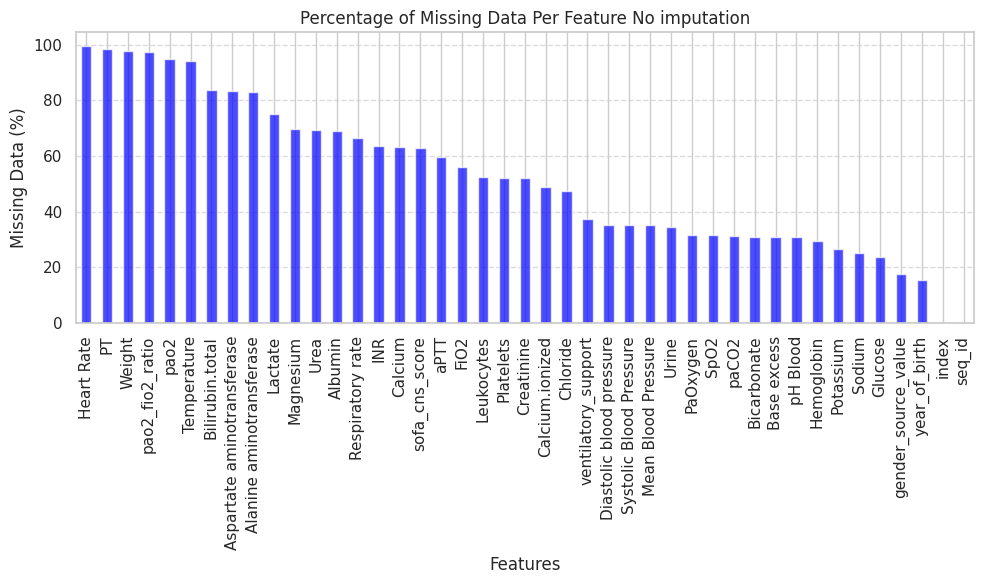

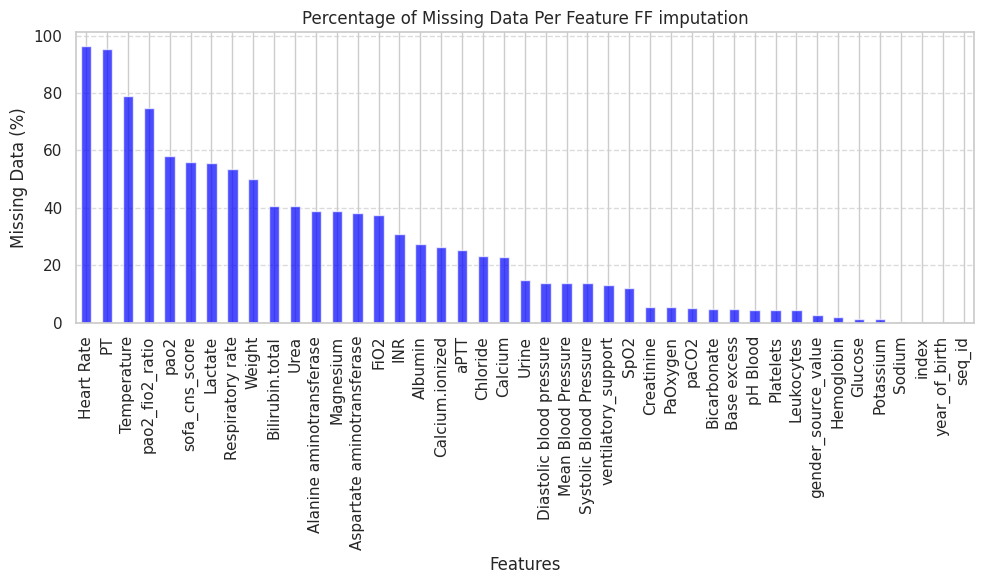

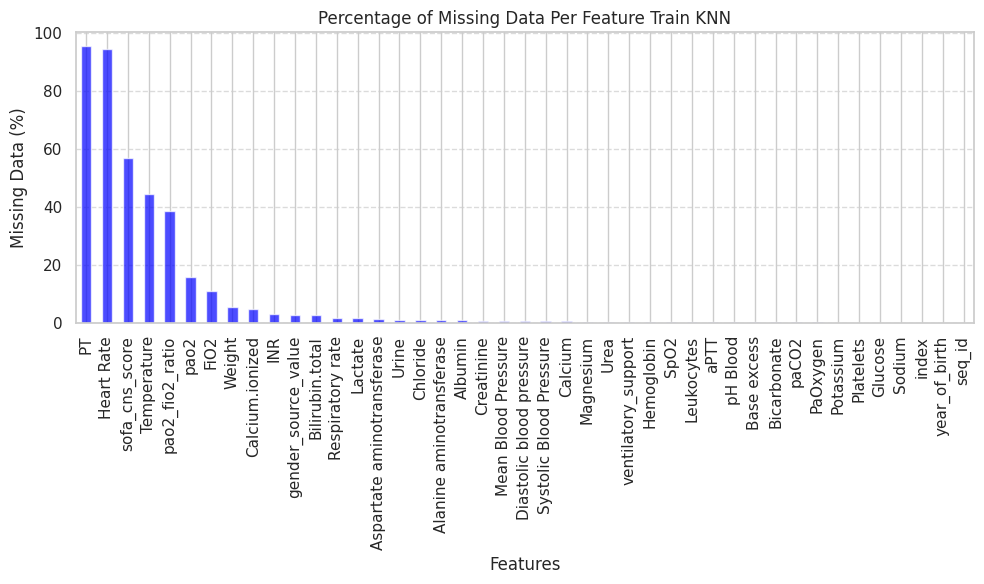

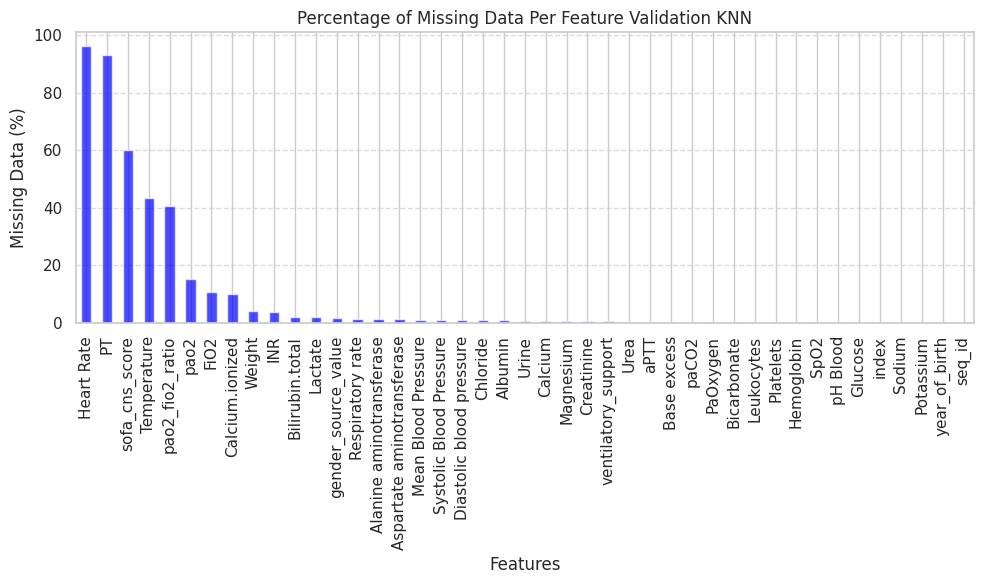

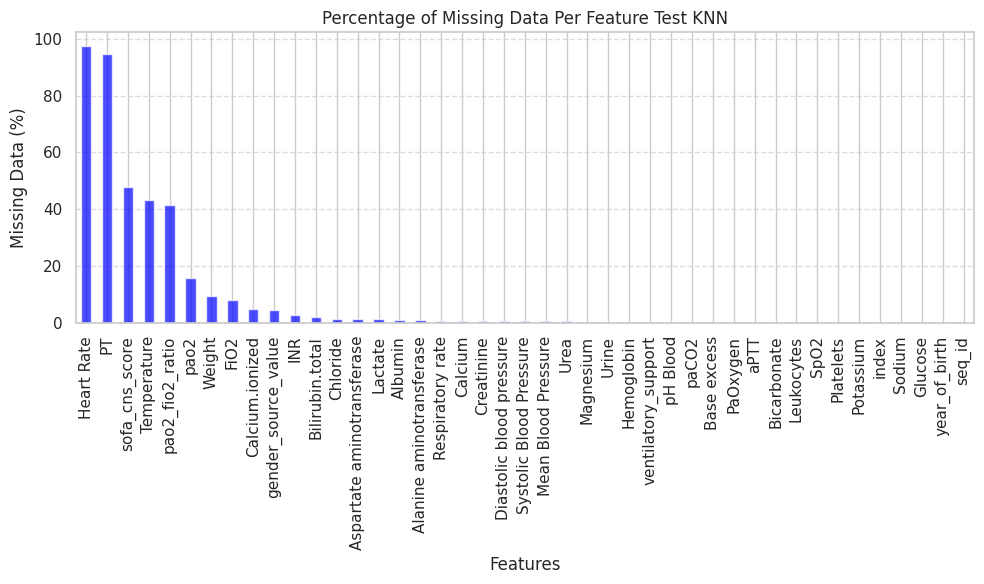

In [37]:

from src.data_processing.process import process_data


df_train, df_val, df_test = process_data(PROJECT_ID, config_gbq, default_path="./MLRFH")

#df_train["pao2"] = (df_train["pao2"] - df_train["pao2"].mean()) / df_train["pao2"].std()
df_train = df_train.reset_index()




# Making the Actions (Space)

## Vasopressors and Ionotropes

In [38]:
query = f"""
WITH filtered_measurement AS (
    SELECT
        visit_occurrence_id,
        value_as_number AS patientweight
    FROM measurement
    WHERE provider_id IS NULL
    AND measurement_concept_id IN (
        3026600, -- Body weight Estimated
        3013762, -- Body weight Measured
        3023166, -- Body weight Stated
        3025315  -- Body weight
    )
),
dosing AS (
    SELECT
        de.person_id,
        de.visit_occurrence_id,
        de.drug_concept_id AS itemid,
        c.concept_name AS item,
        de.drug_exposure_start_datetime AS start_datetime,
        de.drug_exposure_end_datetime AS stop_datetime,
        TIMESTAMP_DIFF(de.drug_exposure_end_datetime, de.drug_exposure_start_datetime, MINUTE) AS duration,
        -- Extract dose and rate from the sig field
        CAST(REGEXP_EXTRACT(de.sig, r'(\\d+\\.?\\d*) mg') AS FLOAT64) AS dose,
        CAST(REGEXP_EXTRACT(de.sig, r'@ (\\d+\\.?\\d*) mg/uur') AS FLOAT64) AS rate,
        'mg/uur' AS rateunit,
        fm.patientweight
    FROM drug_exposure de
    LEFT JOIN visit_occurrence vo ON de.visit_occurrence_id = vo.visit_occurrence_id
    LEFT JOIN concept c ON de.drug_concept_id = c.concept_id
    LEFT JOIN filtered_measurement fm ON de.visit_occurrence_id = fm.visit_occurrence_id
    WHERE c.concept_id IN (
            36411287, -- 50 ML Dopamine 4 MG/ML Injectable Solution
            21088391, -- 50 ML Dobutamine 5 MG/ML Injection
            19076867, -- Epinephrine 0.1 MG/ML Injectable Solution
            2907531  -- 50 ML Norepinephrine 0.2 MG/ML Injection
        )
    AND de.visit_occurrence_id IN {tuple(df_train.reset_index()["visit_occurrence_id"].tolist())}
    AND CAST(REGEXP_EXTRACT(de.sig, r'@ (\\d+\\.?\\d*) mg/uur') AS FLOAT64) > 0.1
)
SELECT
    person_id,
    visit_occurrence_id,
    itemid,
    item,
    duration,
    dose,
    rate,
    rateunit,
    start_datetime,
    stop_datetime,
    patientweight,
    CASE
        -- recalculate the dose to µg/kg/min ('gamma')
        WHEN rateunit = 'mg/uur' THEN (rate * 1000) / patientweight / 60 -- convert mg/hour to µg/kg/min
        ELSE NULL -- Placeholder for other conversions if necessary
    END AS gamma
FROM dosing
ORDER BY visit_occurrence_id, start_datetime
"""

sepsis_vasopressors = pd.read_gbq(query, configuration=config_gbq, use_bqstorage_api=True)

#print(sepsis_vasopressors.head())
print(f"Etracted {len(sepsis_vasopressors)} records")
print(f"Unique vasopressors {sepsis_vasopressors['item'].unique()}")

sepsis_vasopressors.head()

<ipython-input-38-d33c23db63e0>:63: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_vasopressors = pd.read_gbq(query, configuration=config_gbq, use_bqstorage_api=True)


Etracted 44416 records
Unique vasopressors ['50 ML norepinephrine 0.2 MG/ML Injection'
 'epinephrine 0.1 MG/ML Injectable Solution'
 '50 ML Dopamine 4 MG/ML Injectable Solution'
 '50 ML Dobutamine 5 MG/ML Injection']


,person_id,visit_occurrence_id,itemid,item,duration,dose,rate,rateunit,start_datetime,stop_datetime,patientweight,gamma
0,11,11,2907531,50 ML norepinephrine 0.2 MG/ML Injection,75,10.00,8.0,mg/uur,2006-01-01 00:49:00+00:00,2006-01-01 02:04:00+00:00,85.00000000000000000000000000000000000000,1.568627
1,11,11,2907531,50 ML norepinephrine 0.2 MG/ML Injection,75,10.00,8.0,mg/uur,2006-01-01 02:04:00+00:00,2006-01-01 03:19:00+00:00,85.00000000000000000000000000000000000000,1.568627
2,11,11,2907531,50 ML norepinephrine 0.2 MG/ML Injection,75,10.00,8.0,mg/uur,2006-01-01 03:19:00+00:00,2006-01-01 04:34:00+00:00,85.00000000000000000000000000000000000000,1.568627
3,11,11,2907531,50 ML norepinephrine 0.2 MG/ML Injection,56,7.47,8.0,mg/uur,2006-01-01 04:34:00+00:00,2006-01-01 05:30:00+00:00,85.00000000000000000000000000000000000000,1.568627
4,11,11,2907531,50 ML norepinephrine 0.2 MG/ML Injection,15,2.53,10.0,mg/uur,2006-01-01 05:30:00+00:00,2006-01-01 05:45:00+00:00,85.00000000000000000000000000000000000000,1.960784


### Calculating Epinephrine Equivalent Values[[1](https://pmc.ncbi.nlm.nih.gov/articles/PMC3590882/pdf/chest_143_3_664.pdf)] (e-table 2)

| Vasopressor | Norepinephrine Equivalent Dose |
|-|-|
|Epinephrine| 1 |
| Norepinephrin | 1 |
|Dopamin| 0.01|
|Dobutamine**| 0.01 |




** Derived from VIS-score[[1](https://www.sciencedirect.com/science/article/abs/pii/S1053077020310351?fr=RR-1&ref=cra_js_challenge)]

Exact values might differ [[2](https://www.researchgate.net/publication/367302762_An_updated_norepinephrine_equivalent_score_in_intensive_care_as_a_marker_of_shock_severity/fulltext/63cb3720d9fb5967c2f1bafe/An-updated-norepinephrine-equivalent-score-in-intensive-care-as-a-marker-of-shock-severity.pdf?origin=publication_detail&_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uRG93bmxvYWQiLCJwcmV2aW91c1BhZ2UiOiJwdWJsaWNhdGlvbiJ9fQ)].

In [39]:
convert_dict = {
    "epinephrine": 1.0,
    "norepinephrine": 1.0,
    "dopamine": 0.01,
    "dobutamine": 0.01,
}


def equalize_dose(row):
    for key in convert_dict.keys():
        if key in row["item"].lower():
            return row["gamma"] * convert_dict[key]
    raise ValueError(f"Unknown vasopressor {row['item']}")


sepsis_vasopressors["equiv_gamma"] = sepsis_vasopressors.apply(equalize_dose, axis=1)

# drop outliers based in inter quantile range
sepsis_vasopressors_cleaned = sepsis_vasopressors[sepsis_vasopressors["equiv_gamma"] < sepsis_vasopressors["equiv_gamma"].quantile(0.99)]
sepsis_vasopressors_cleaned = sepsis_vasopressors_cleaned.reset_index()

for item in sepsis_vasopressors_cleaned["item"].unique():
    print("Mean dose for:", item, sepsis_vasopressors_cleaned[sepsis_vasopressors_cleaned["item"] == item]["equiv_gamma"].mean())

Mean dose for: 50 ML norepinephrine 0.2 MG/ML Injection 0.3058485622861922
Mean dose for: epinephrine 0.1 MG/ML Injectable Solution 0.41344837214947205
Mean dose for: 50 ML Dopamine 4 MG/ML Injectable Solution 0.05551432206661338
Mean dose for: 50 ML Dobutamine 5 MG/ML Injection 0.0437097305436295


|Dose Range	|Mean|Mode|% of Data
|[0]|?	|?	|?	
|]0-0.08|0.050483864747739436|0.07843137450980393|0.25212672685481385
|]0.08-0.22|0.14040329964749665|0.08888889111111112|0.31155659818487713
|]0.22-0.45|0.3170342427589407|0.22222222222222224|0.22563446363830242
|>0.45|0.7802873484498746|0.5333333555555556|0.2106822113220066


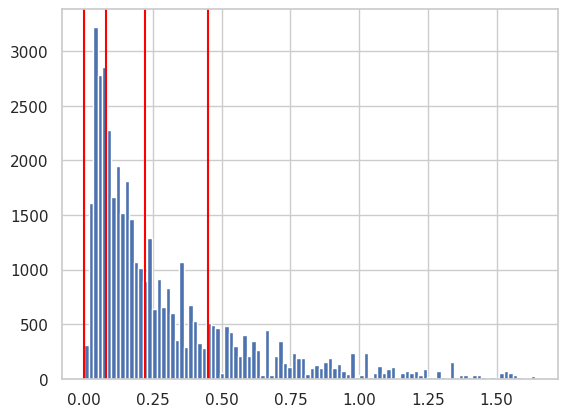

In [40]:
# make histogram of data
sepsis_vasopressors_cleaned["equiv_gamma"].hist(bins=100)

bins = [0, 0, 0.08, 0.22, 0.45]


print("|Dose Range\t|Mean|Mode|% of Data")
for i, bin in enumerate(bins):
    if i == 0:
        print(f"|[0]|?\t|?\t|?\t")
        continue
    if i == len(bins) - 1:
        bin_vasopressor = sepsis_vasopressors_cleaned[
              sepsis_vasopressors_cleaned["equiv_gamma"] > bin
        ]
        print(f"|>{bin}", end="")
    else:
        bin_vasopressor = sepsis_vasopressors_cleaned[
            (sepsis_vasopressors_cleaned["equiv_gamma"] > bin) & (sepsis_vasopressors_cleaned["equiv_gamma"] <= bins[i+1])
        ]
        print(f"|]{bin}-{bins[i+1]}", end="")
    print(f"|{bin_vasopressor['equiv_gamma'].mean()}|{bin_vasopressor['equiv_gamma'].mode().mean()}|{len(bin_vasopressor)/len(sepsis_vasopressors_cleaned)}")
    plt.axvline(bin, color="red")



## Fluid Intake

In [41]:
sepsis_fluid = pd.read_gbq(
    f'''
    SELECT m.person_id, m.measurement_concept_id, c.concept_name, measurement_datetime, value_as_number, m.visit_occurrence_id
    FROM measurement as m

    LEFT JOIN concept c ON m.measurement_concept_id = c.concept_id

    WHERE m.visit_occurrence_id IN {tuple(df_train.reset_index()["visit_occurrence_id"].tolist())}
    AND m.provider_id IS NULL
    AND (c.concept_id = 3010494 or c.concept_id = 3037253 or c.concept_id = 3037253 or c.concept_id = 3013308)
    GROUP BY m.person_id, m.measurement_concept_id, c.concept_name, measurement_datetime, value_as_number, m.visit_occurrence_id
    '''
    , configuration=config_gbq, use_bqstorage_api=True)

sepsis_fluid["value_as_number"] = sepsis_fluid["value_as_number"].astype(float)
sepsis_fluid_cleaned = sepsis_fluid[sepsis_fluid["value_as_number"] < sepsis_fluid["value_as_number"].quantile(0.99)]
print(sepsis_fluid.columns)
sepsis_fluid.head()

<ipython-input-41-532e3b0927c2>:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_fluid = pd.read_gbq(


Index(['person_id', 'measurement_concept_id', 'concept_name',
       'measurement_datetime', 'value_as_number', 'visit_occurrence_id'],
      dtype='object')


,person_id,measurement_concept_id,concept_name,measurement_datetime,value_as_number,visit_occurrence_id
0,18562,3013308,Fluid intake Measured,2013-01-25 19:31:00+00:00,0.0,21504
1,17461,3013308,Fluid intake Measured,2006-01-05 03:57:00+00:00,0.0,20231
2,17461,3013308,Fluid intake Measured,2006-01-15 00:57:00+00:00,0.0,20231
3,17461,3013308,Fluid intake Measured,2006-01-14 03:57:00+00:00,0.0,20231
4,17461,3013308,Fluid intake Measured,2006-01-15 01:37:00+00:00,0.0,20231


<Axes: >

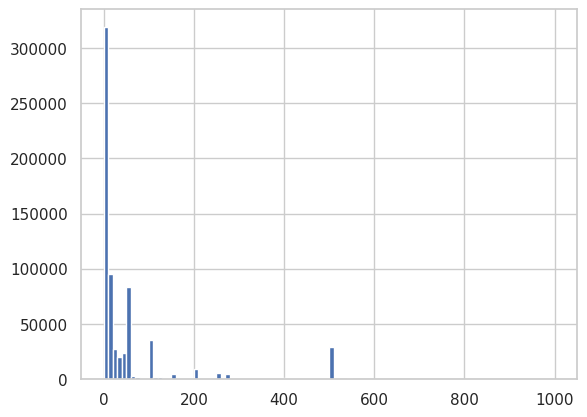

In [42]:
# make histogram for fluids
fluid_ranges = {
    0, 0, 50, 180, 530
}
sepsis_fluid_cleaned["value_as_number"].hist(bins=100)


In [43]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_actions(df_sequences, df_vasopressors):
    # Step 2: Apply the function to df2
    tqdm.pandas()
    gamma_sum = df_sequences.progress_apply(lambda row: compute_window_gamma(row, df_vasopressors), axis=1)

    # Calculate average gamma (handle total_hours = 0 case)
    gamma_sum["average_gamma"] = gamma_sum["total_gamma"] / gamma_sum['total_hours']
    gamma_sum['average_gamma'] = gamma_sum['average_gamma'].fillna(0)  # Fill NaN for empty windows
    return gamma_sum["average_gamma"]


def compute_window_gamma(row, df_vasopressors):
    # Filter intervals from df1 that overlap with the current window
    row["window_end"] = row["measurement_datetime"] + pd.Timedelta(hours=12)
    row["window_start"] = row["measurement_datetime"]

    overlapping = df_vasopressors[
        (df_vasopressors['start_datetime'] < row['window_end']) &\
        (df_vasopressors['stop_datetime'] > row['window_start']) &\
        (df_vasopressors["visit_occurrence_id"] == row["visit_occurrence_id"])
    ]

    if overlapping.empty:
        return pd.Series({'total_gamma': 0, 'total_hours': 0})

    # Calculate overlap duration for normalization
    overlapping['overlap_start'] = overlapping["start_datetime"].apply(lambda x: max(x, row["window_start"]))
    overlapping['overlap_end'] = overlapping["stop_datetime"].apply(lambda x: min(x, row["window_end"]))
    overlapping['overlap_duration'] = (overlapping['overlap_end'] - overlapping['overlap_start']).dt.total_seconds() / 3600  # in hours

    # Compute weighted gamma
    overlapping['weighted_gamma'] = overlapping['equiv_gamma'] * overlapping['overlap_duration']

    # Aggregate results for this window
    total_gamma = overlapping['weighted_gamma'].sum()
    total_hours = overlapping['overlap_duration'].sum()
    return pd.Series({'total_gamma': total_gamma, 'total_hours': total_hours})


gamma_avg = calculate_actions(df_train[["visit_occurrence_id", "measurement_datetime"]], sepsis_vasopressors_cleaned)


100%|██████████| 34794/34794 [03:13<00:00, 180.19it/s]


average_gamma    0.715498
Name: 0.99, dtype: float64


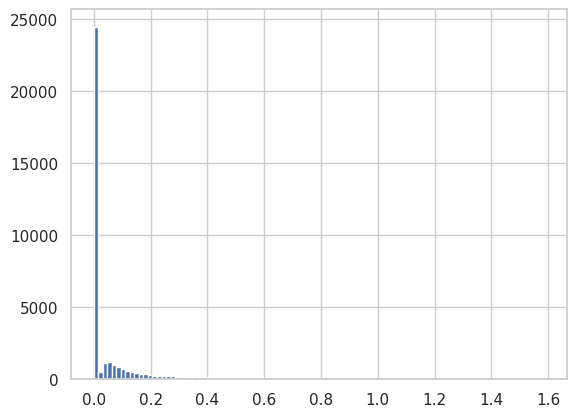

In [44]:
gamma_avg.hist(bins=100)
print(pd.DataFrame(gamma_avg).quantile(0.99))

In [45]:
def add_windowed_sum_apply(df_windows, df_values, time_column, value_column, start_col, time_frame, output_col):
    """
    Add a column to `df_windows` with the sum of values in `df_values` that fall within the time windows.

    Parameters:
        df_windows (pd.DataFrame): The DataFrame with time windows.
        df_values (pd.DataFrame): The DataFrame with values and their corresponding timestamps.
        time_column (str): The name of the time column in `df_values`.
        value_column (str): The name of the value column in `df_values`.
        start_col (str): The name of the start time column in `df_windows`.
        end_col (str): The name of the end time column in `df_windows`.
        output_col (str): The name of the column to add to `df_windows` for the sum.

    Returns:
        pd.DataFrame: The `df_windows` DataFrame with the added column.
    """
    # Ensure the time columns are datetime
    df_windows["window_end"] = df_windows[start_col] + pd.Timedelta(hours=time_frame)

    # Define a function to calculate the sum for a single window
    def calculate_sum(row):
        start_time, end_time = row[start_col], row["window_end"]
        return df_values[
            (df_values[time_column] >= start_time) &\
            (df_values[time_column] <= end_time) &\
            (df_values["visit_occurrence_id"] == row["visit_occurrence_id"])
        ][value_column].sum()

    # Apply the function row-wise and create a new column
    df_windows[output_col] = df_windows.progress_apply(calculate_sum, axis=1)

    return df_windows[output_col]

#df_train = df_train.reset_index()
sepsis_fluid_cleaned["measurement_datetime"] = pd.to_datetime(sepsis_fluid_cleaned["measurement_datetime"])
sepsis_fluid_cleaned["value_as_number"] = sepsis_fluid_cleaned["value_as_number"].astype(float)

df_train["fluid_intake"] = add_windowed_sum_apply(
    df_train,
    sepsis_fluid_cleaned,
    "measurement_datetime",
    "value_as_number",
    "measurement_datetime",
    12,
    "fluid_intake_sum"
)


<ipython-input-45-f845480a34f5>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis_fluid_cleaned["measurement_datetime"] = pd.to_datetime(sepsis_fluid_cleaned["measurement_datetime"])
<ipython-input-45-f845480a34f5>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis_fluid_cleaned["value_as_number"] = sepsis_fluid_cleaned["value_as_number"].astype(float)
100%|██████████| 34794/34794 [05:39<00:00, 102.41it/s]


1089.2372821695892
11745.6000081
2930.4400000899996


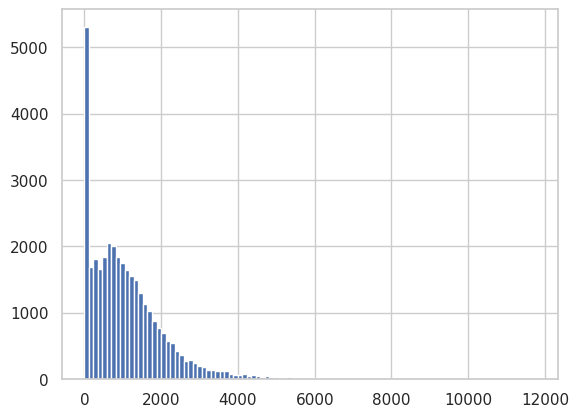

In [46]:
df_train["fluid_intake_sum"].hist(bins=100)
print(df_train["fluid_intake_sum"].mean())
print(df_train["fluid_intake_sum"].max())
print(df_train["fluid_intake_sum"].quantile(0.95))

# Generate

In [202]:
import numpy as np


def calculate_states(fluids, vaosprssors):
    """
    Categorize two NumPy arrays into discrete states and compute unique scores.

    Parameters:
        array1 (numpy.ndarray): The first array.
        array2 (numpy.ndarray): The second array.

    Returns:
        numpy.ndarray: A NumPy array of scores representing unique states (0 to 8).
    """
    # Validate input
    if len(fluids) != len(vaosprssors):
        raise ValueError("Both arrays must have the same length.")
    median_fluids = np.median(fluids[fluids != 0])  # median for non 0 values
    median_vaso = np.median(vaosprssors[vaosprssors != 0])  # median for non 0 values
    # Define categories for array1
    cat_fluids = np.zeros_like(fluids, dtype=int)
    cat_fluids[fluids == 0] = 0
    cat_fluids[(fluids > 0) & (fluids <= median_fluids)] = 1
    cat_fluids[(fluids > median_fluids)] = 2

    # Define categories for array2
    cat_vaso = np.zeros_like(vaosprssors, dtype=int)
    cat_vaso[vaosprssors == 0] = 0
    cat_vaso[(vaosprssors > 0) & (vaosprssors <= median_vaso)] = 1
    cat_vaso[(vaosprssors > median_vaso)] = 2
    #print(cat2)
    print(median_fluids)
    print(median_vaso)

    # Compute unique scores based on the combination of categories
    # Scores are computed as: cat1 * 3 + cat2
    scores = cat_fluids * 3 + cat_vaso
    print("Fluids", np.unique(cat_fluids, return_counts=True))
    print("VPs", np.unique(cat_vaso, return_counts=True))
    state_mapping = {
    "vasopressor": ["0", f"(0-{median_fluids:.2f}]", f"> {median_fluids:.2f}"],
    "fluid": ["0", f"(0-{median_vaso:.3f}]", f"> {median_vaso:.3f}"]
    }

    return scores, state_mapping
df_train["action"], state_mapping = calculate_states(df_train["fluid_intake_sum"].values, gamma_avg.values)

print(df_train["action"].unique())
print(state_mapping)

1031.5
0.10851449377616747
Fluids (array([0, 1, 2]), array([ 4357, 15219, 15218]))
VPs (array([0, 1, 2]), array([24379,  5208,  5207]))
[0 8 6 7 3 5 4 2 1]
{'vasopressor': ['0', '(0-1031.50]', '> 1031.50'], 'fluid': ['0', '(0-0.109]', '> 0.109']}


[0 8 6 7 3 5 4 2 1]


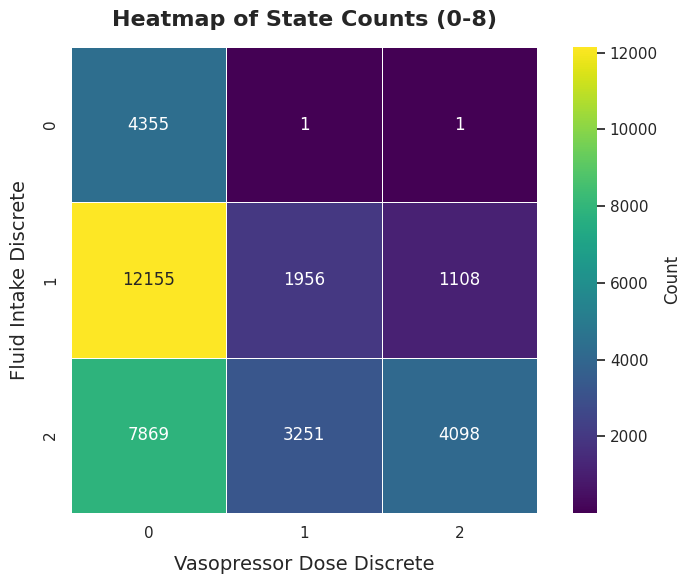

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap(scores):
    """
    Plot a 3x3 heatmap where each cell is colored by the count of scores (0-8).

    Parameters:
        scores (numpy.ndarray): Array of scores in the range [0, 8].

    Returns:
        None
    """
    # Ensure scores are within the valid range [0, 8]
    if not np.all((0 <= scores) & (scores <= 8)):
        raise ValueError("Scores must be in the range [0, 8].")

    # Count occurrences for each score
    counts = np.bincount(scores, minlength=9)

    # Reshape counts into a 3x3 matrix
    heatmap_matrix = counts.reshape(3, 3)

    # Create the heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        heatmap_matrix,
        annot=True,                # Annotate with count values
        fmt="d",                   # Integer format for annotations
        cmap="viridis",            # Color map
        cbar_kws={"label": "Count"},  # Colorbar label
        linewidths=0.5,            # Add gridlines for clarity
        linecolor="white",         # Gridline color
        square=True                # Ensure square cells
    )

    # Add labels and title
    ax.set_title("Heatmap of State Counts (0-8)", fontsize=16, fontweight="bold", pad=15)
    ax.set_xlabel("Vasopressor Dose Discrete", fontsize=14, labelpad=10)
    ax.set_ylabel("Fluid Intake Discrete", fontsize=14, labelpad=10)
    ax.set_xticks([0.5, 1.5, 2.5], ["0", "1", "2"])
    ax.set_yticks([0.5, 1.5, 2.5], ["0", "1", "2"])

    # Adjust plot layout
    plt.tight_layout()
    plt.show()

# Example usage
print(df_train["action"].unique())
plot_heatmap(df_train["action"].values)


# Outcome Data - In hospital Mortality

<ipython-input-67-89851f9578fb>:2: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  sepsis_death = pd.read_gbq(


236 persons died of sepsis in the hospital
883 persons survived ICU


<Axes: >

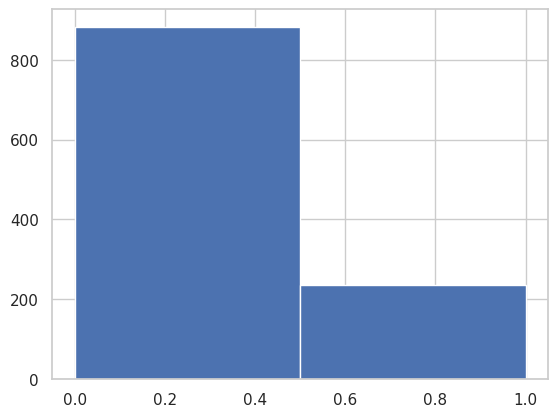

In [67]:
#df_train = df_train.reset_index()
sepsis_death = pd.read_gbq(
    f'''
    SELECT
        vo.person_id,
        vo.visit_occurrence_id,
        d.death_datetime,
        vo.visit_start_datetime,
        vo.visit_end_datetime,
        ABS(TIMESTAMP_DIFF(vo.visit_start_datetime, d.death_datetime, DAY)) AS in_hospital_survived
    from visit_occurrence AS vo
    LEFT JOIN death AS d
        ON vo.person_id = d.person_id
    WHERE vo.visit_occurrence_id IN {tuple(df_train["visit_occurrence_id"].tolist())}
    GROUP BY vo.person_id, vo.visit_occurrence_id, d.death_datetime, vo.visit_start_datetime, vo.visit_end_datetime
    '''
    , configuration=config_gbq, use_bqstorage_api=True)
# Ensure the columns are datetime objects
sepsis_death['death_datetime'] = pd.to_datetime(sepsis_death['death_datetime'])
sepsis_death['visit_end_datetime'] = pd.to_datetime(sepsis_death['visit_end_datetime'])
sepsis_death['visit_start_datetime'] = pd.to_datetime(sepsis_death['visit_start_datetime'])

# Set 'in_hospital_survived' to NaN where death_datetime is after visit_end_datetime
sepsis_death.loc[:,'died_in_hospital'] = 0
sepsis_death.loc[
    (sepsis_death['death_datetime'] <= sepsis_death['visit_end_datetime']) &\
    (sepsis_death['death_datetime'] >= sepsis_death['visit_start_datetime']),
    'died_in_hospital'
] = 1
sepsis_death['died_in_hospital'] = sepsis_death['died_in_hospital'].fillna(0).astype(int)

sepsis_death_filtered = sepsis_death.merge(
    df_train[["visit_occurrence_id"]],
    on="visit_occurrence_id",
    how="inner"
)

sepsis_death_filtered = sepsis_death_filtered.groupby(by=['visit_occurrence_id']).first().reset_index()

print((sepsis_death_filtered["died_in_hospital"]==1).sum(), "persons died of sepsis in the hospital")
print((sepsis_death_filtered["died_in_hospital"]==0).sum(), "persons survived ICU")

sepsis_death_filtered["died_in_hospital"].hist(bins=2)


<ipython-input-68-7ddc868a9ec8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


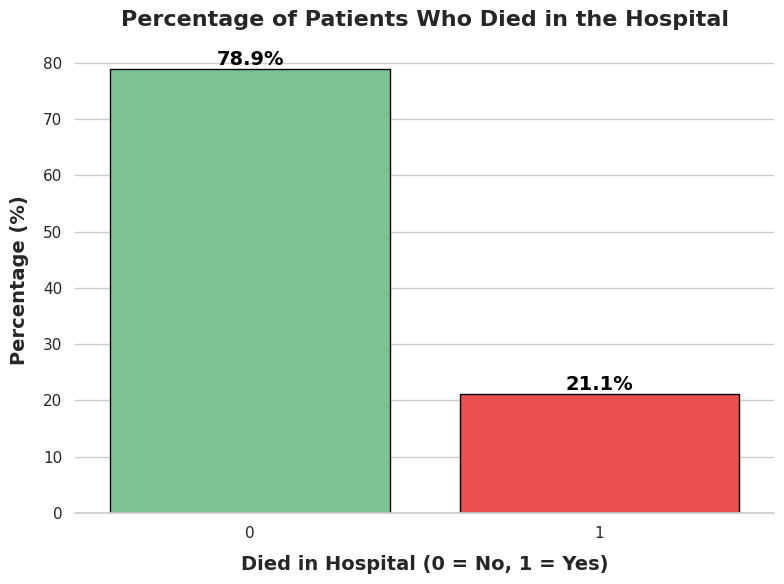

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage distribution
counts = sepsis_death_filtered["died_in_hospital"].value_counts(normalize=True) * 100

# Create a DataFrame for seaborn
plot_data = counts.reset_index()
plot_data.columns = ["Died in Hospital", "Percentage"]

# Create the Seaborn barplot
sns.set_theme(style="whitegrid")  # Set Seaborn theme
fig, ax = plt.subplots(figsize=(8, 6))
palette = ["#76c893", "#f94144"]  # Custom colors for 'No' and 'Yes'

sns.barplot(
    x="Died in Hospital", y="Percentage", data=plot_data,
    palette=palette, ax=ax, saturation=0.85, edgecolor="black"
)

# Customize the plot
ax.set_title("Percentage of Patients Who Died in the Hospital", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Died in Hospital (0 = No, 1 = Yes)", fontsize=14, fontweight="bold", labelpad=10)
ax.set_ylabel("Percentage (%)", fontsize=14, fontweight="bold", labelpad=10)

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=14, fontweight="bold", color="black")

# Remove unnecessary spines
sns.despine(left=True, bottom=False)

# Show the plot
plt.tight_layout()
plt.show()


In [70]:
# Making the binary in-hospital death
print(len(df_train))
df_train = df_train.merge(
    sepsis_death_filtered[["visit_occurrence_id", "died_in_hospital"]],
    on="visit_occurrence_id",
    how="left"
)
print(len(df_train))
print(df_train["died_in_hospital"].unique())
df_train["died_in_hospital"] = df_train["died_in_hospital"].fillna(0).astype(int)

34794
34794
[1 0]


       visit_occurrence_id  seq_id  died_in_hospital
0                       11       1                 1
1                       11       2                 1
2                       11       3                 1
3                       11       4                 1
4                       37       1                 0
...                    ...     ...               ...
34789                23540       2                 0
34790                23540       3                 0
34791                23540       4                 0
34792                23540       5                 0
34793                23540       6                 0

[34794 rows x 3 columns]
[   0 -100  100]
reward
 0      33675
 100      883
-100      236
Name: count, dtype: int64


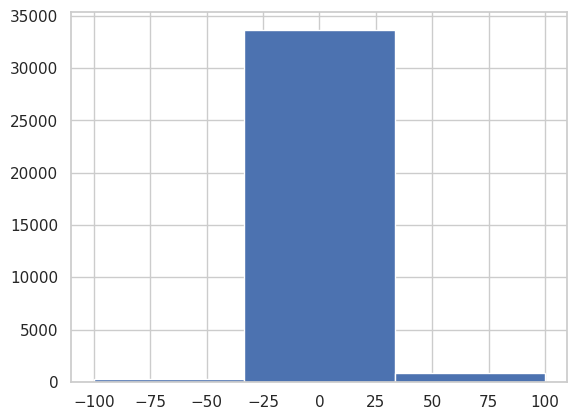

In [71]:
df_train["reward"] = 0
df_train = df_train.sort_values(by=["visit_occurrence_id", "measurement_datetime"])
# Add sequence_id within each visit_occurrence_id
df_train["seq_id"] = df_train.groupby("visit_occurrence_id").cumcount() + 1
# Find the row index for the maximum sequence_id for each visit_occurrence_id
max_sequence_indices = df_train.groupby("visit_occurrence_id")["seq_id"].idxmax()
print(df_train[["visit_occurrence_id", "seq_id", "died_in_hospital"]])

# Set reward to 100 or -100 based on died_in_hospital flag
df_train.loc[max_sequence_indices, "reward"] = df_train.loc[max_sequence_indices, "died_in_hospital"].apply(
    lambda x: 100 if x == 0.0 else -100
)

df_train["reward"].hist(bins=3)
print(df_train["reward"].unique())
print(df_train["reward"].value_counts())

# Obtaining States

In [72]:
# Clustering
from src.clustering import cluster_kmpp
# chose numeric columns
print(df_train.columns)
df_train_clust = df_train[[
    'gender_source_value', 'year_of_birth', 'Alanine aminotransferase',
    'Albumin', 'Aspartate aminotransferase', 'Base excess', 'Bicarbonate',
    'Bilirubin.total', 'Calcium', 'Calcium.ionized', 'paCO2',
    'Chloride', 'Creatinine', 'Diastolic blood pressure', 'FiO2', 'Glucose',
    'Hemoglobin', 'INR', 'Lactate', 'Leukocytes', 'Magnesium',
    'Mean Blood Pressure', 'PaOxygen', 'Platelets', 'Potassium',
    'Respiratory rate', 'Sodium', 'SpO2', 'Systolic Blood Pressure', 'Urea',
    'Urine', 'Weight', 'aPTT', 'pH Blood', 'ventilatory_support',
    'pao2_fio2_ratio', 'pao2']]

kmeans, cluster_centers = cluster_kmpp(df_train_clust, k=200)
df_train["state"] = kmeans.predict(df_train_clust)

Index(['visit_occurrence_id', 'measurement_datetime', 'index',
       'gender_source_value', 'year_of_birth', 'Alanine aminotransferase',
       'Albumin', 'Aspartate aminotransferase', 'Base excess', 'Bicarbonate',
       'Bilirubin.total', 'Calcium', 'Calcium.ionized', 'Chloride',
       'Creatinine', 'Diastolic blood pressure', 'FiO2', 'Glucose',
       'Hemoglobin', 'INR', 'Lactate', 'Leukocytes', 'Magnesium',
       'Mean Blood Pressure', 'PaOxygen', 'Platelets', 'Potassium',
       'Respiratory rate', 'Sodium', 'SpO2', 'Systolic Blood Pressure', 'Urea',
       'Urine', 'Weight', 'aPTT', 'pH Blood', 'paCO2', 'ventilatory_support',
       'pao2_fio2_ratio', 'pao2', 'seq_id', 'window_end', 'fluid_intake_sum',
       'fluid_intake', 'action', 'died_in_hospital', 'reward'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [73]:
df_train.describe()

,visit_occurrence_id,index,gender_source_value,year_of_birth,Alanine aminotransferase,Albumin,Aspartate aminotransferase,Base excess,Bicarbonate,Bilirubin.total,...,ventilatory_support,pao2_fio2_ratio,pao2,seq_id,fluid_intake_sum,fluid_intake,action,died_in_hospital,reward,state
count,34794.0,34794.000000,34794.000000,34794.0,34794.000000,34794.000000,34794.000000,34794.000000,34794.000000,34794.000000,...,34794.0,34794.000000,34794.000000,34794.000000,34794.000000,34794.000000,34794.000000,34794.000000,34794.000000,34794.000000
mean,11471.349572,-0.017850,0.058028,-0.033523,0.059127,0.007119,-0.032846,0.008482,0.024319,0.035686,...,-0.145132,-0.056065,0.070186,39.002328,1089.237282,1089.237282,4.385440,0.281457,1.859516,97.900500
std,6585.871942,0.994239,0.978483,0.988895,0.962356,0.971756,0.937960,1.012926,1.017904,1.011510,...,1.020625,0.838892,0.822668,45.311316,1007.343790,1007.343790,2.421948,0.449716,17.836999,58.031454
min,11.0,-1.732018,-1.263037,-1.704481,-3.703759,-3.230001,-3.469364,-2.582375,-2.842577,-3.296733,...,-1.544863,-1.614957,-5.528284,1.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000
25%,6014.0,-0.892821,-1.263037,-0.557652,-0.623112,-0.688156,-0.730928,-0.652361,-0.644960,-0.735473,...,-1.544863,-0.684923,-0.133786,10.000000,346.200000,346.200000,3.000000,0.000000,0.000000,48.000000
50%,11799.0,0.003395,0.791730,-0.35527,0.044836,-0.002182,-0.074141,0.049772,0.040207,-0.034648,...,0.699091,-0.111394,0.037282,25.000000,884.050001,884.050001,4.000000,0.000000,0.000000,96.000000
75%,16632.0,0.773690,0.791730,0.319335,0.771121,0.636623,0.632909,0.676523,0.679398,0.792148,...,0.699091,0.543442,0.339942,53.000000,1545.900008,1545.900008,6.000000,1.000000,0.000000,148.000000
max,23540.0,1.731975,0.791730,2.478073,2.104307,2.350946,2.129468,3.062124,2.845584,2.073865,...,0.699091,2.170458,27.832755,428.000000,11745.600008,11745.600008,8.000000,1.000000,100.000000,199.000000


<ipython-input-74-7953ad875762>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap("tab10", len(unique_clusters))


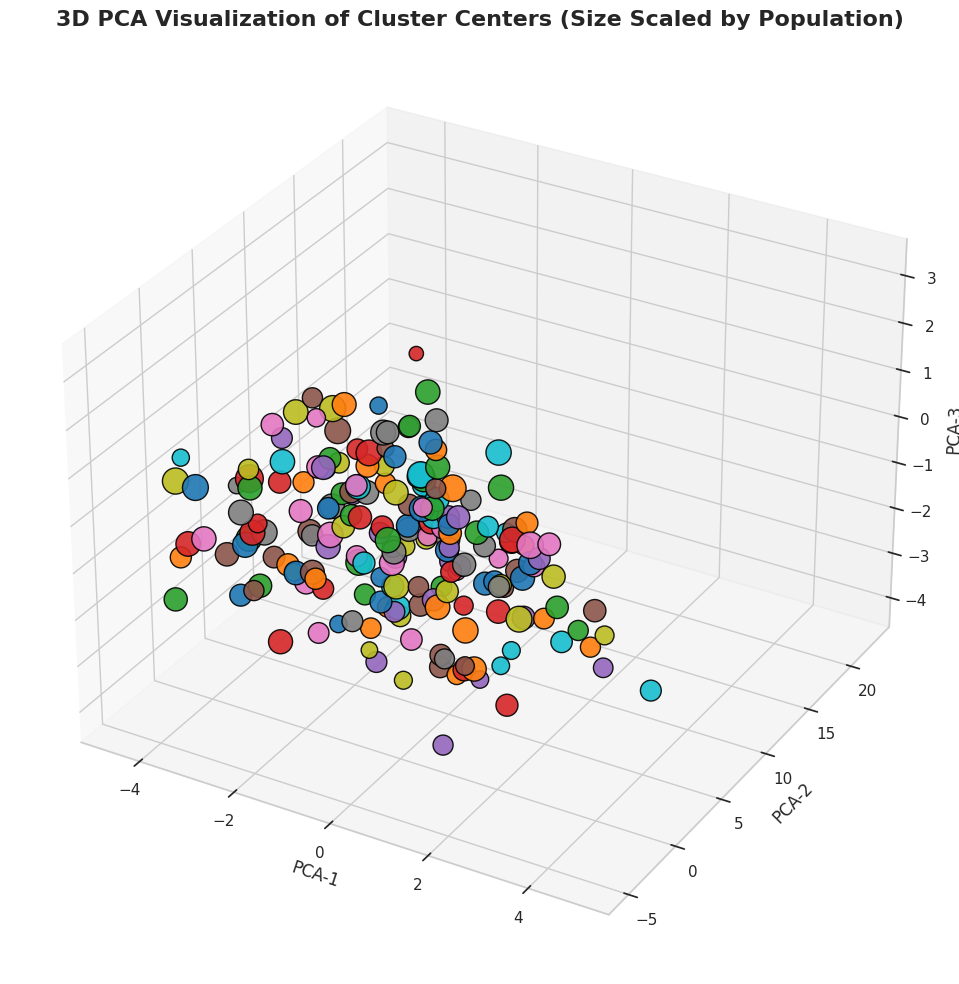

In [74]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your clustered data)
data = df_train_clust.copy().values  # Replace with your data
cluster_labels = df_train["state"].values  # Replace with your cluster labels

# Calculate cluster centers and sizes
unique_clusters = np.unique(cluster_labels)
cluster_centers = np.array([data[cluster_labels == cluster].mean(axis=0) for cluster in unique_clusters])
cluster_sizes = np.array([np.sum(cluster_labels == cluster) for cluster in unique_clusters])  # Cluster population

# Apply PCA to reduce cluster centers to 3D
pca = PCA(n_components=3)
pca_results = pca.fit_transform(cluster_centers)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(pca_results, columns=["PCA-1", "PCA-2", "PCA-3"])
pca_df["Cluster"] = unique_clusters
pca_df["Size"] = cluster_sizes

# Generate a color palette for distinct colors
color_palette = plt.cm.get_cmap("tab10", len(unique_clusters))
colors = [color_palette(cluster) for cluster in unique_clusters]

# Normalize cluster sizes for plotting
marker_sizes = (pca_df["Size"] / pca_df["Size"].max()) * 300 + 100  # Scale marker sizes

# 3D Plot using Matplotlib
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for cluster centers
scatter = ax.scatter(
    pca_df["PCA-1"], pca_df["PCA-2"], pca_df["PCA-3"],
    c=colors, s=marker_sizes, alpha=0.9, edgecolor="black"
)

# Add labels and title
ax.set_title("3D PCA Visualization of Cluster Centers (Size Scaled by Population)", fontsize=16, fontweight="bold")
ax.set_xlabel("PCA-1", fontsize=12)
ax.set_ylabel("PCA-2", fontsize=12)
ax.set_zlabel("PCA-3", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [75]:
del data

In [78]:
df_train[["state", "action", "reward", "seq_id"]].head(50)

,state,action,reward,seq_id
0,35,0,0,1
1,54,8,0,2
2,54,8,0,3
3,54,8,-100,4
4,112,0,0,1
5,112,6,0,2
6,112,8,0,3
7,112,8,0,4
8,112,7,0,5
9,112,6,0,6


# Transform df for training

In [98]:
import pandas as pd

# Example DataFrame
df_train_rl = df_train[['state','action','reward','seq_id','visit_occurrence_id']]

# Initialize an empty list to store trajectory data
trajectory_data = []

# Group by 'id' to handle each trajectory independently
for _, group in df_train_rl.groupby('visit_occurrence_id'):
    group = group.sort_values('seq_id')  # Ensure the sequence is sorted
    states = group['state'].tolist()
    actions = group['action'].tolist()
    rewards = group['reward'].tolist()

    # Create next_state by shifting 'state' column
    next_states = states[1:] + [-1]  # Last next_state is None

    # Create done flag (1 for the last step, 0 otherwise)
    done_flags = [0] * (len(states) - 1) + [1]

    # Build the trajectory data
    for i in range(len(states)):
        trajectory_data.append({
            'state': states[i],
            'action': actions[i],
            'reward': rewards[i],
            'next_state': next_states[i],
            'done': done_flags[i]
        })

# Convert trajectory data to a DataFrame
trajectory_data = pd.DataFrame(trajectory_data)

# Display the result
print(trajectory_data)
print(trajectory_data.dtypes)


       state  action  reward  next_state  done
0         35       0       0          54     0
1         54       8       0          54     0
2         54       8       0          54     0
3         54       8    -100          -1     1
4        112       0       0         112     0
...      ...     ...     ...         ...   ...
34789    118       8       0         118     0
34790    118       8       0          65     0
34791     65       8       0         118     0
34792    118       7       0          53     0
34793     53       7     100          -1     1

[34794 rows x 5 columns]
state         int64
action        int64
reward        int64
next_state    int64
done          int64
dtype: object


In [125]:
import numpy as np
import pandas as pd

class QLearningAgent:
    def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.99):
        """
        Initialize the Q-learning agent.

        Parameters:
        - state_space_size: Number of states (discretized features).
        - action_space_size: Number of discrete actions.
        - learning_rate: Step size for updating Q-values.
        - discount_factor: Discount factor for future rewards.
        """
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((state_space_size, action_space_size), dtype=np.float64)  # Initialize Q-table

    def update_batch(self, states, actions, rewards, next_states):
        """
        Update the Q-table using a batch of transitions, considering terminal states represented as -1.

        Parameters:
        - states: Array of current states.
        - actions: Array of actions taken.
        - rewards: Array of observed rewards.
        - next_states: Array of resulting next states, with -1 for terminal states.
        """
        td_targets = rewards.copy()

        # Mask for non-terminal states
        non_terminal_mask = next_states != -1

        # For non-terminal states, include the discounted future rewards
        if np.any(non_terminal_mask):
            next_states_non_terminal = next_states[non_terminal_mask].astype(int)  # Convert valid states to int
            best_next_actions = np.argmax(self.q_table[next_states_non_terminal], axis=1)
            td_targets[non_terminal_mask] += (
                self.discount_factor * self.q_table[next_states_non_terminal, best_next_actions]
            )

        # Ensure td_targets dtype matches q_table dtype
        td_targets = td_targets.astype(self.q_table.dtype)

        # Update Q-values
        for i in range(len(states)):
            td_error = td_targets[i] - self.q_table[states[i], actions[i]]
            self.q_table[states[i], actions[i]] += self.learning_rate * td_error

# Define state and action space sizes
state_space_size = trajectory_data['state'].max() + 1
action_space_size = trajectory_data['action'].max() + 1

# Initialize Q-learning agent
agent = QLearningAgent(state_space_size, action_space_size)

# Training with batch processing
batch_size = 2
for i in range(0, len(trajectory_data), batch_size):
    # Extract batch
    batch = trajectory_data.iloc[i:i + batch_size]
    states = batch['state'].values
    actions = batch['action'].values
    rewards = batch['reward'].astype(float).values
    next_states = batch['next_state'].values

    # Update Q-table using the batch
    agent.update_batch(states, actions, rewards, next_states)

# Print the trained Q-table
print("Trained Q-Table:")
print(agent.q_table)


Trained Q-Table:
[[12.51337801  0.          0.         ...  9.35437625 13.5416112
   9.0538473 ]
 [40.88445806  0.          0.         ... 42.6715878   9.41676336
   0.        ]
 [ 4.17192945  0.          0.         ...  9.25692702  6.93971441
   6.19930655]
 ...
 [ 4.58219275  0.          0.         ... 11.252618    4.70480274
   1.30848993]
 [10.85449967  0.          0.         ... 13.60813058 15.67943351
  17.00826131]
 [14.92546103  0.          0.         ... 12.76695479  5.70927792
   1.29185952]]


[1.25165258e-01 2.87405875e-05 2.87405875e-05 3.49341841e-01
 5.62165891e-02 3.18445709e-02 2.26159683e-01 9.34356498e-02
 1.17778927e-01]
[[1.25165258e-01 2.87405875e-05 2.87405875e-05]
 [3.49341841e-01 5.62165891e-02 3.18445709e-02]
 [2.26159683e-01 9.34356498e-02 1.17778927e-01]]


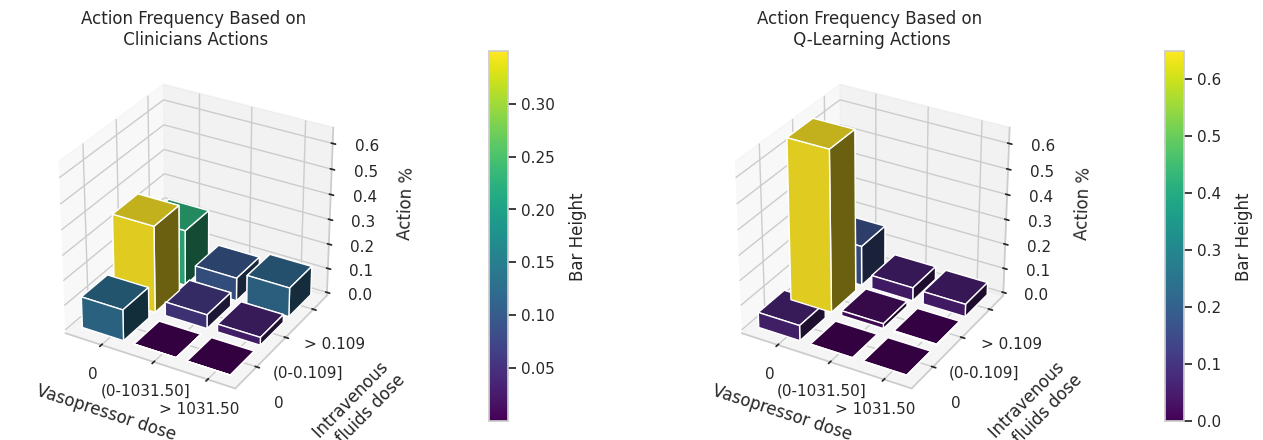

In [275]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# Append optimal actions from Q-table to trajectory data
output_data = trajectory_data.copy()
output_data['optimal_action'] = trajectory_data['state'].apply(lambda s: np.argmax(agent.q_table[s]))


# 3D Bar Plot for Action Frequency Based on Actions Column
action_counts = np.bincount(output_data['action'], minlength=9)
action_counts = action_counts / sum(action_counts)
optimal_action_counts = np.bincount(output_data['optimal_action'], minlength=9)
optimal_action_counts = optimal_action_counts / sum(optimal_action_counts)
print(action_counts)
z_bar_height = max(optimal_action_counts.max(), action_counts.max())

# fuild * 3 + vaso
# Prepare a 3x3 grid for actions

action_grid_x, action_grid_y = np.meshgrid(range(3), range(3))
action_grid_z = action_counts.reshape(3, 3)
optimal_action_grid_z = optimal_action_counts.reshape(3, 3)
print(action_grid_z)

# Create the 3D bar plot
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

xpos = action_grid_x.ravel()
ypos = action_grid_y.ravel()
zpos = np.zeros_like(xpos)



for ax, bar_heights, title in [
    (ax1, action_grid_z, 'Action Frequency Based on\n Clinicians Actions'),
    (ax2, optimal_action_grid_z, 'Action Frequency Based on\n Q-Learning Actions')
]:
    dx = dy = 0.8  # Width of the bars
    dz = bar_heights.flatten()  # Heights of the bars

    # Normalize the bar heights (dz) for the colormap
    norm = mcolors.Normalize(vmin=dz.min(), vmax=dz.max())
    cmap = cm.viridis  # Choose a colormap

    # Map the bar heights (dz) to colors
    colors = cmap(norm(dz))

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True,  color=colors, edgecolor='white')
    #ax.view_init(elev=30, roll=0)
    ax.set_box_aspect(aspect=(1,1,1), zoom=0.9)
    ax.set_xlabel('Vasopressor dose        ', labelpad=10)
    ax.set_ylabel('       Intravenous\n          fluids dose', labelpad=30)
    ax.set_xticks([0.5, 1.5, 2.5], state_mapping["vasopressor"])
    ax.tick_params(axis='y', pad=10)  # Add padding for x-axis
    ax.set_yticks([0.5, 1.5, 2.5], state_mapping["fluid"])

    ax.set_zlabel('Action %', labelpad=20)
    ax.tick_params(axis='z', pad=10)  # Add padding for x-axis
    ax.set_zlim(0, z_bar_height)  # Replace max_height with your desired maximum height

    ax.set_title(title)

    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required for colorbar
    cbar = plt.colorbar(sm, ax=ax, shrink=0.4, pad=0.2)  # Adjust size and position
    cbar.set_label('Bar Height', labelpad=10)


ax.dist = 20
plt.show()


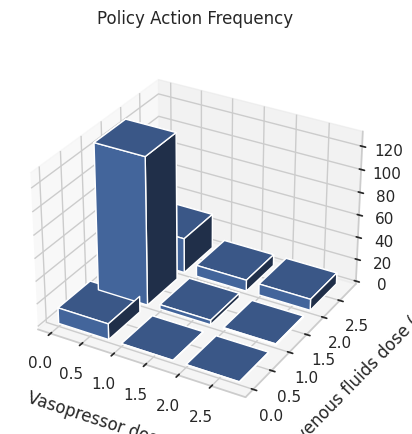

In [226]:
# 3D Bar Plot for Action Frequency
# Simulate a policy by taking the action with the highest Q-value for each state
policy = np.argmax(agent.q_table, axis=1)

# Count the frequency of each action (0-8)
action_counts = np.bincount(policy, minlength=9)

# Prepare a 3x3 grid for actions
action_grid_x, action_grid_y = np.meshgrid(range(3), range(3))
action_grid_z = action_counts.reshape(3, 3)

# Create the 3D bar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = action_grid_x.flatten()
ypos = action_grid_y.flatten()
zpos = np.zeros_like(xpos)

dx = dy = 0.8  # Width of the bars
dz = action_grid_z.flatten()  # Heights of the bars

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, cmap='viridis')
ax.set_xlabel('Vasopressor dose (x)', labelpad=10)
ax.set_ylabel('Intravenous fluids dose (y)', labelpad=10)
ax.set_zlabel('Action Frequency', labelpad=10)
ax.set_title('Policy Action Frequency', pad=20)

plt.show()


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PolicyIterationAgent:
    def __init__(self, state_space_size, action_space_size, discount_factor=0.99, threshold=1e-3):
        """
        Initialize the Policy Iteration agent.

        Parameters:
        - state_space_size: Number of states.
        - action_space_size: Number of actions.
        - discount_factor: Discount factor for future rewards.
        - threshold: Convergence threshold for policy evaluation.
        """
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.discount_factor = discount_factor
        self.threshold = threshold

        # Initialize value function and policy
        self.value_function = np.zeros(state_space_size)
        self.policy = np.zeros(state_space_size, dtype=int)

    def policy_evaluation(self, trajectory_data):
        """
        Perform policy evaluation to update the value function.
        """
        while True:
            delta = 0
            for _, row in trajectory_data.iterrows():
                state, action, reward, next_state, done = row['state'], row['action'], row['reward'], row['next_state'], row['done']
                action = self.policy[state]  # Use the current policy
                if done:
                    target = reward
                else:
                    target = reward + self.discount_factor * self.value_function[next_state]
                delta = max(delta, abs(self.value_function[state] - target))
                self.value_function[state] = target
            if delta < self.threshold:  # Check for convergence
                break

    def policy_improvement(self, trajectory_data):
        """
        Perform policy improvement to update the policy based on the value function.
        """
        policy_stable = True
        for _, row in trajectory_data.iterrows():
            state, action, reward, next_state, done = row['state'], row['action'], row['reward'], row['next_state'], row['done']
            action_values = np.zeros(self.action_space_size)
            for a in range(self.action_space_size):
                filtered_rows = trajectory_data[(trajectory_data['state'] == state) & (trajectory_data['action'] == a)]
                expected_value = sum(
                    r + self.discount_factor * self.value_function[ns] * (not d)
                    for _, (s, a, r, ns, d) in filtered_rows.iterrows()
                )
                action_values[a] = expected_value
            best_action = np.argmax(action_values)
            if self.policy[state] != best_action:
                policy_stable = False
            self.policy[state] = best_action
        return policy_stable

    def policy_iteration(self, trajectory_data):
        """
        Perform policy iteration to find the optimal policy.
        """
        while True:
            self.policy_evaluation(trajectory_data)  # Evaluate the current policy
            if self.policy_improvement(trajectory_data):  # Improve the policy
                break


# Define state and action space sizes
state_space_size = trajectory_data['state'].max() + 1
action_space_size = trajectory_data['action'].max() + 1

# Initialize Policy Iteration agent
agent = PolicyIterationAgent(state_space_size, action_space_size)

# Perform policy iteration
agent.policy_iteration(trajectory_data)

# Print the final policy and value function
print("Optimal Policy:", agent.policy)
print("Value Function:", agent.value_function)


KeyboardInterrupt: 